**Universidad Politécnica de Guanajuato**  
**Ingeniería Robótica**  
**Mecanismos y máquinas**  
**Análisis cinemático de mecanismos planos utilizando software**

# Una barra rígida

Se tiene una barra rígida de longitud $r=0.25$ m, girando en sentido antihorario a una velocidad angular constante de $\omega = 5$ rad/s. Para una revolución completa, calcule la velocidad y aceleración horizontal y vertical del extremo de la barra.

## Graficando la posición durante una revolución

En lo siguiente graficamos 20 posiciones de la barra a lo largo de una revolución completa.

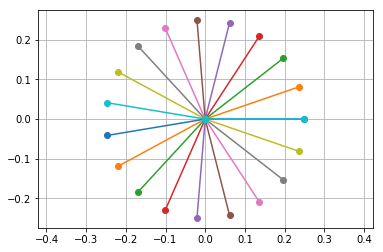

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,cos,sin,tan
%matplotlib inline

def plotvector(p0,u,color="r"):
    """
    Gráfica un vector, dados su punto inicial 
    y sus componentes rectangulares
    """
    plt.plot([p0[0],p0[0]+u[0]],[p0[1],p0[1]+u[1]],color)

r = 0.25
theta = pi/6
for theta in np.linspace(0,2*pi,20):
    R = np.array([r*cos(theta),r*sin(theta)])
    plotvector([0,0],R,'-o')
    plt.axis('equal')
    plt.grid('on') # rejilla

## Velocidad lineal del extremo

La velocidad del extremo viene dada por:

$$ v_P =  < -r \omega \sin\theta, r \omega \cos \theta >$$


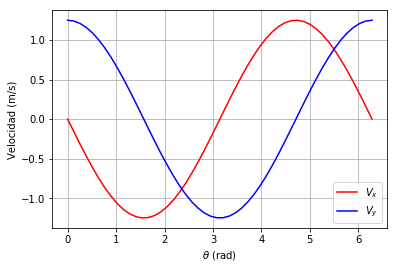

In [4]:
omega = 5 # rad/s
theta = np.linspace(0,2*pi)
V = np.array([-r*omega*sin(theta), r*omega*cos(theta)])
plt.plot(theta, V[0], color="r", label="$V_x$") # Velocidad en x
plt.plot(theta, V[1], color="b", label="$V_y$") # Velocidad en y
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('Velocidad (m/s)')
plt.legend()
plt.grid('on')

### Aceleración lineal del extremo

De manera general, la aceleración del extremo viene dada por:

$$ a_P = < - r\alpha \sin\theta - r\omega^2 \cos\theta, \quad r\alpha\cos\theta - r\omega^2\sin\theta> $$

Dado que $\omega$ es una constante, entonces $\alpha=0$, de modo que la expresión anterior puede reducirse a:

$$ a_P = < - r\omega^2 \cos\theta, - r\omega^2\sin\theta> $$

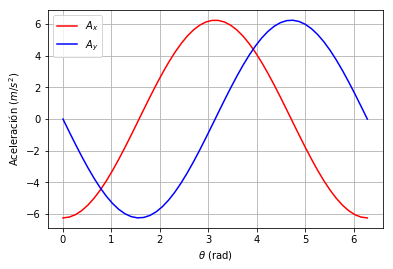

In [5]:
A = np.array([-r*(omega**2)*cos(theta), -r*(omega**2)*sin(theta)])
plt.plot(theta, A[0], color="r", label="$A_x$") # Aceleración en x
plt.plot(theta, A[1], color="b", label="$A_y$") # Aceleración en y
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('Aceleración ($m/s^2$)')
plt.legend()
plt.grid('on')

## Vectores de velocidad para diversas posiciones de la barra

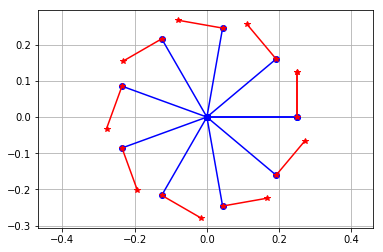

In [6]:
for theta in np.linspace(0,2*pi,10):
    R = np.array([r*cos(theta),r*sin(theta)])
    V = np.array([-r*omega*sin(theta), r*omega*cos(theta)])/10
    plotvector([0,0], R, 'b-o')
    plotvector(R,V, 'r-*')
    plt.axis('equal')
    plt.grid('on') # rejilla

## Vectores de aceleración para diversas posiciones de la barra

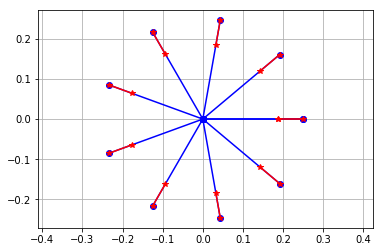

In [7]:
for theta in np.linspace(0,2*pi,10):
    R = np.array([r*cos(theta),r*sin(theta)])
    A = np.array([-r*(omega**2)*cos(theta), -r*(omega**2)*sin(theta)])/100
    plotvector([0,0], R, 'b-o')
    plotvector(R,A, 'r-*')
    plt.axis('equal')
    plt.grid('on') # rejilla

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


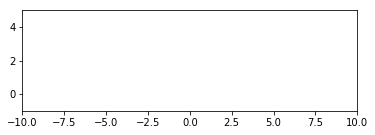

In [43]:
import matplotlib.animation as anim
from IPython.display import HTML

r2,r3 = 3, 8

fig, ax = plt.subplots()
line1, = ax.plot([],[],lw=2)
line2, = ax.plot([],[],lw=2)
xdata, ydata = [], []

def data_gen(t2=0):
    while (t2<2*pi):
        t3 = np.arcsin(-r2*sin(t2)/r3)
        r1 = r2*cos(t2) + r3*cos(t3)
        t2 += pi/180
        yield r1,t2,t3

def init():
    ax.set_xlim([-10,10])
    ax.set_ylim([-1,5])
    ax.set_aspect('equal')
    line1.set_data(xdata, ydata)
    line2.set_data(xdata, ydata)
    return line1,line2

def run(data):
    r1,t2,t3 = data
    R2 = np.array([r2*cos(t2),r2*sin(t2)])
    R3 = np.array([r3*cos(t3),r3*sin(t3)])
    line1.set_data([0,R2[0]],[0,R2[1]])
    line2.set_data([R2[0],R2[0]+R3[0]],[R2[1],R2[1]+R3[1]])
    return line1,line2
    
ani = anim.FuncAnimation(fig, run, data_gen, blit=False, interval=20, repeat=False, init_func=init);
ani.save('mbc.html');